<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T3%20-%201%20-%20Statistics%20-%20Correlación-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17706, done.
remote: Total 17706 (delta 0), reused 0 (delta 0), pack-reused 17706
Receiving objects: 100% (17706/17706), 523.15 MiB | 16.88 MiB/s, done.
Resolving deltas: 100% (333/333), done.
Checking out files: 100% (16940/16940), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [2]:
import pandas as pd

In [3]:
data_ads = pd.read_csv("https://raw.githubusercontent.com/quiquegtz27/python-ml-course/Collab---v-3.8/datasets/ads/Advertising.csv")

In [4]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
len(data_ads)

200

In [6]:
import numpy as np

Para calcular el coeficiente de correlación de Pearson, se crean 3 columnas. 1 para el numerador y 2 para el denominador: 
  
  $r = \frac{\sum_{i=1}^{n} (x_i-\overline{x})(y_i-̅\overline{y})}{\sqrt{\sum_{i=1}^{n} (x_i-\overline{x})^2  \sum_{i=1}^{n} (y_i-\overline{y})^2}}$

In [7]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [8]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [9]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [10]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [11]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [12]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [13]:
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [14]:
corrn

0.782224424861606

##Función para calcular el coficiente de correlación de Pearson

In [16]:
def corr_coeff(df, var1, var2): #df: Dataframe
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [17]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

Volvemos a cargar el dataset para eliminar las columnas añadidas por la función:

In [26]:
data_ads = pd.read_csv("https://raw.githubusercontent.com/quiquegtz27/python-ml-course/Collab---v-3.8/datasets/ads/Advertising.csv")
data_ads.head()
cols = data_ads.columns.values

Para conocer la correlación entre las variables con todas las demás dentro del dataset:

In [27]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583006
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583006
Radio, Radio : 1.0
Radio, Newspaper : 0.35410375076117545
Radio, Sales : 0.576222574571055
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.35410375076117545
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616534
Sales, TV : 0.782224424861606
Sales, Radio : 0.576222574571055
Sales, Newspaper : 0.22829902637616534
Sales, Sales : 1.0


In [28]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Ventas del producto')

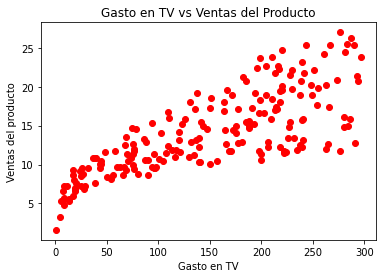

In [31]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")
plt.xlabel("Gasto en TV")
plt.ylabel("Ventas del producto")

Text(0, 0.5, 'Ventas del producto')

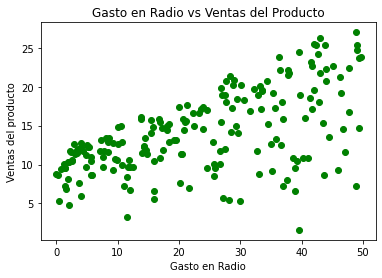

In [33]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")
plt.xlabel("Gasto en Radio")
plt.ylabel("Ventas del producto")

Text(0, 0.5, 'Ventas del producto')

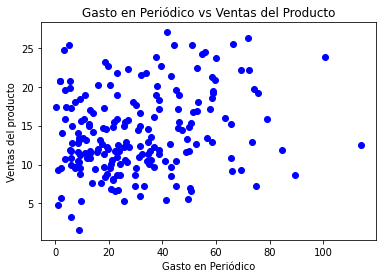

In [34]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs Ventas del Producto")
plt.xlabel("Gasto en Periódico")
plt.ylabel("Ventas del producto")

In [37]:
data_ads = pd.read_csv("/content/python-ml-course/datasets/ads/Advertising.csv")
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


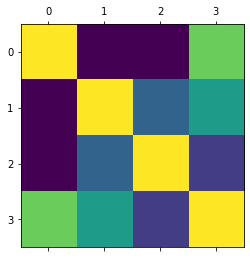

In [38]:
plt.matshow(data_ads.corr())